In [33]:
import numpy as np
import pandas as pd 
import matplotlib as plt
import seaborn as sns 


In [34]:
%matplotlib inline

In [35]:
df=pd.read_csv('kyphosis.csv')

In [36]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


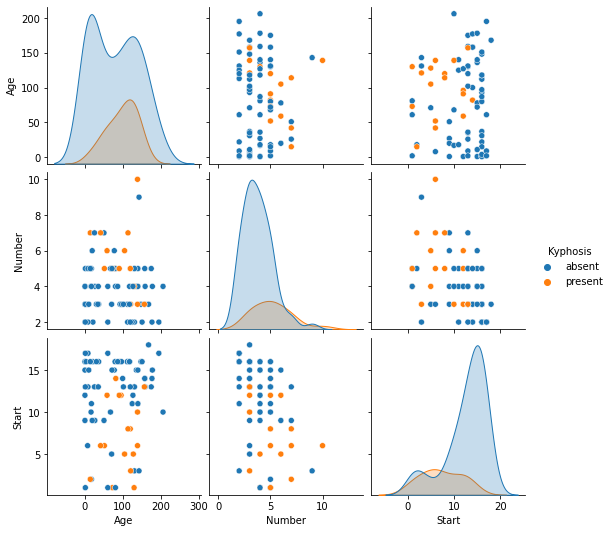

In [38]:
sns.pairplot(df, hue='Kyphosis')


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X=df.drop('Kyphosis',axis=1)

In [41]:
y=df['Kyphosis']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree=DecisionTreeClassifier()

In [45]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
predictions=dtree.predict(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[17  2]
 [ 6  0]]


              precision    recall  f1-score   support

      absent       0.74      0.89      0.81        19
     present       0.00      0.00      0.00         6

    accuracy                           0.68        25
   macro avg       0.37      0.45      0.40        25
weighted avg       0.56      0.68      0.62        25



In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc= RandomForestClassifier(n_estimators=200)

In [51]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [52]:
rfc_pred=rfc.predict(X_test)

In [53]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[18  1]
 [ 6  0]]


              precision    recall  f1-score   support

      absent       0.75      0.95      0.84        19
     present       0.00      0.00      0.00         6

    accuracy                           0.72        25
   macro avg       0.38      0.47      0.42        25
weighted avg       0.57      0.72      0.64        25



In [54]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

# Visualization

In [55]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features


['Age', 'Number', 'Start']

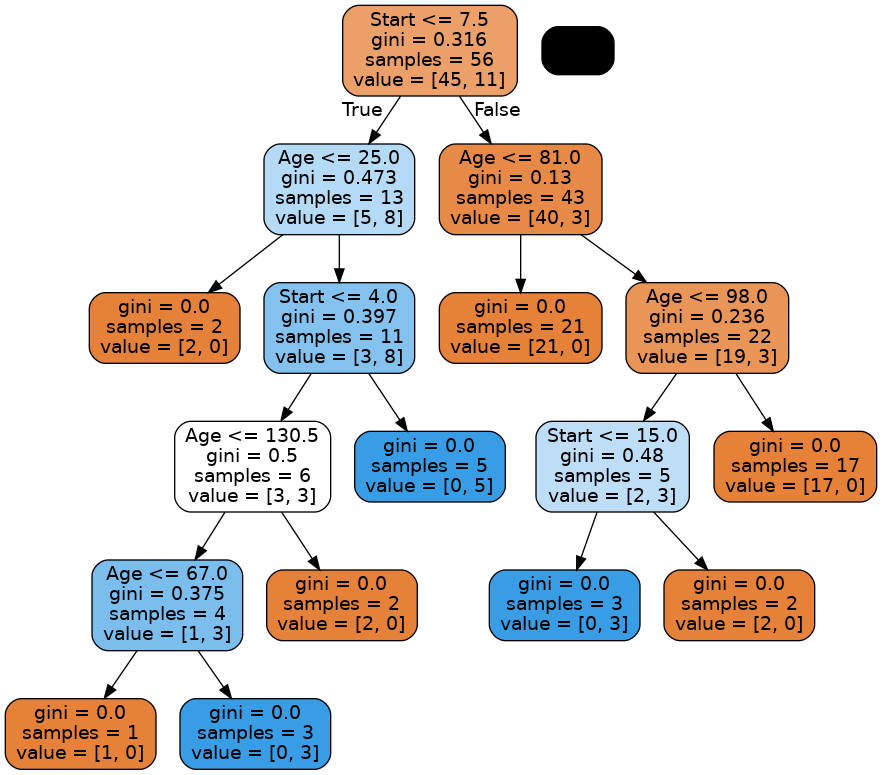

In [59]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())
